<a href="https://www.kaggle.com/code/mikedelong/eda-with-map?scriptVersionId=137294426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/los-angeles-crime-dataset-2020-present/Crime_Data_from_2020_to_Present.csv', 
                 parse_dates=['Date Rptd', 'DATE OCC']).drop(columns=['DR_NO'])
df.sample(n=7)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
14077,2020-04-16,2020-04-07,400,8,West LA,834,1,310,BURGLARY,1202 1606 0344 1822 1605,...,AO,Adult Other,310.0,NaN,NaN,NaN,10700 WILKINS AV,NaN,34.0561,-118.4354
604673,2022-06-23,2022-06-23,1524,17,Devonshire,1765,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1210 0913 0554 0602 0421 0422 1501,...,IC,Invest Cont,930.0,NaN,NaN,NaN,19000 MERRIDY ST,NaN,34.2523,-118.5471
173861,2020-07-02,2020-06-10,1900,12,77th Street,1253,1,310,BURGLARY,0344 0321,...,IC,Invest Cont,310.0,NaN,NaN,NaN,1800 W 73RD ST,NaN,33.9737,-118.3096
68111,2020-03-29,2020-03-28,2250,4,Hollenbeck,401,1,761,BRANDISH WEAPON,0334 0913 0361 0421,...,AO,Adult Other,761.0,NaN,NaN,NaN,4500 MOSHER AV,NaN,34.0950,-118.2045
538317,2022-02-05,2022-02-04,1246,17,Devonshire,1767,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1609 0913 0361 0603 0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,18200 SUPERIOR ST,NaN,34.2464,-118.5299
87880,2020-09-07,2020-09-07,1000,8,West LA,839,1,210,ROBBERY,1822 0344 0400 0421 0448 0429 2004,...,IC,Invest Cont,210.0,NaN,NaN,NaN,CENTURY PK,SANTA MONICA,34.0586,-118.4164
239510,2021-02-05,2021-02-02,1930,18,Southeast,1832,1,330,BURGLARY FROM VEHICLE,0385 1822,...,IC,Invest Cont,330.0,NaN,NaN,NaN,MAIN ST,105TH ST,33.9410,-118.2739


In [2]:
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Vict Age', ylabel='Density'>

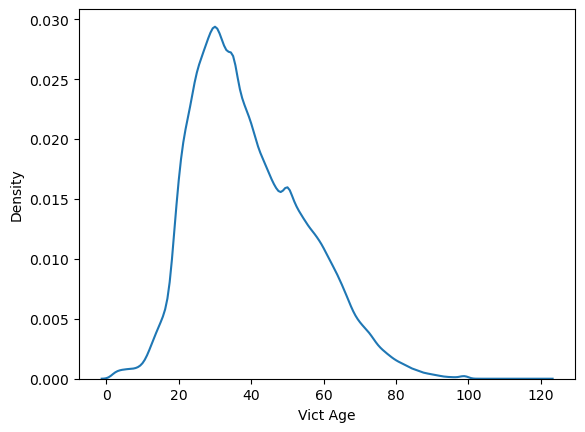

In [3]:
# let's look at some distributions
%matplotlib inline
from seaborn import kdeplot
# we need to drop ages = 0 to filter out unknowns
kdeplot(data=df[df['Vict Age'] > 0], x='Vict Age')

In [4]:
from folium import Icon
from folium import Map
from folium import Marker

sample_size = 500

# we have a limited color map so we loop it to pad it out
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple',
          'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray'] * 7
code_color_map = dict(zip(tuple(df['Crm Cd'].unique()), tuple(colors)))

# for some reason we have to fudge the center a little
lon_fudge = -0.5
location_map = Map(location=[df['LAT'].mean(), df['LON'].mean() + lon_fudge], zoom_start=10)
for index, row in df.sample(sample_size).iterrows():
    popup = '{}/{}/{}:{}'.format(row['LOCATION'], row['AREA NAME'], row['Crm Cd Desc'], row['Status'])
    Marker([row['LAT'], row['LON']], popup=popup, icon=Icon(color=code_color_map[row['Crm Cd']])).add_to(parent=location_map)

location_map

In [5]:
df.shape

(752911, 27)

In [6]:
df['Crm Cd'].nunique()

138

We have 138 codes; clearly we can't make sense of a pie with that many slices, so let's look at the top ten or so

In [7]:
crime_code_value_counts = df['Crm Cd Desc'].value_counts()
code_df = pd.DataFrame(data={'Code': crime_code_value_counts.index, 'Count': crime_code_value_counts.values}).reset_index(drop=True)
code_df.head(10)

,Code,Count
0,VEHICLE - STOLEN,80439
1,BATTERY - SIMPLE ASSAULT,59630
2,THEFT OF IDENTITY,48645
3,BURGLARY FROM VEHICLE,46526
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",46157
5,BURGLARY,45717
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",43149
7,THEFT PLAIN - PETTY ($950 & UNDER),38510
8,INTIMATE PARTNER - SIMPLE ASSAULT,37947
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),29310


In [8]:
import plotly.express as px
code_df.loc[code_df['Count'] < 15000, 'Code'] = 'Other' # we have too many codes so let's apply a threshold
px.pie(code_df, names='Code', values='Count').show()

In [9]:
# Surely the areas are shaped so the crime is roughly the same in each one; right?
area_value_counts = df['AREA NAME'].value_counts()
area_df = pd.DataFrame(data={'Area': area_value_counts.index, 'Count': area_value_counts.values}).reset_index(drop=True)
px.pie(area_df, names='Area', values='Count').show()

In [10]:
victim_descent = df['Vict Descent'].replace(to_replace={'B': 'Black', 'H': 'Hispanic', 'W': 'White',}).value_counts()
descent_df = pd.DataFrame(data={'Descent': victim_descent.index, 'Count': victim_descent.values}).reset_index(drop=True)
descent_df.loc[descent_df['Count'] < 80000, 'Descent'] = 'Other' # threshold
px.pie(descent_df, names='Descent', values='Count').show()

<Axes: xlabel='DATE OCC'>

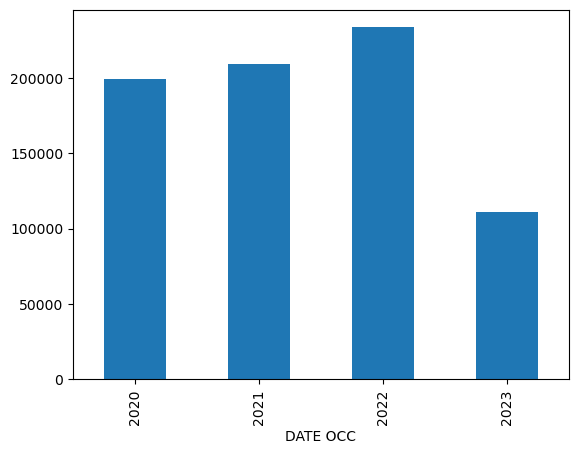

In [11]:
# not surprisingly we have an incomplete current year
df['DATE OCC'].groupby(df['DATE OCC'].dt.year).count().plot(kind='bar')

<Axes: xlabel='year'>

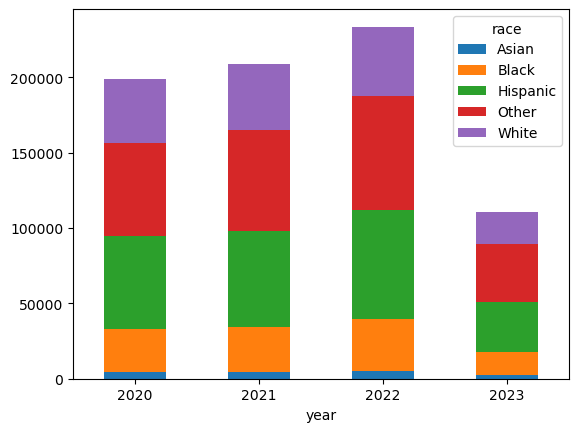

In [12]:
# is the victim's race stable year over year?
year_race_df = df[['DATE OCC', 'Vict Descent']].copy(deep=True)
year_race_df['year'] = year_race_df['DATE OCC'].dt.year
year_race_df = year_race_df.drop(columns=['DATE OCC']).rename(columns={'Vict Descent': 'race'})
year_race_df['race'] = year_race_df['race'].apply(func=lambda x: x if x in {'A', 'B', 'H', 'W'} else 
                                                  'Other').replace({'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'W': 'White'})
year_race_df.groupby(['year', 'race']).size().unstack().plot(kind='bar', stacked=True, rot=0)

<Axes: xlabel='DATE OCC'>

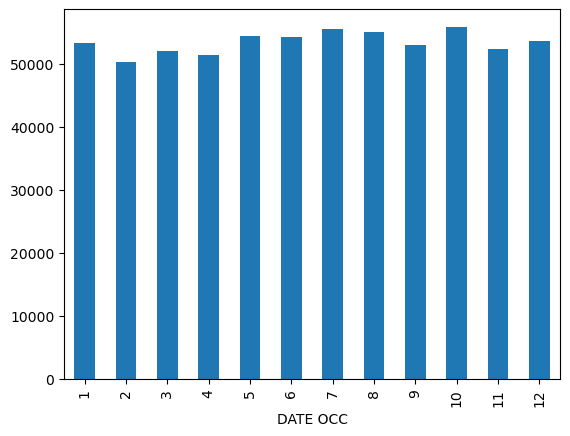

In [13]:
# where we have complete years we do not have obvious seasonality
df[df['DATE OCC'].dt.year < 2023]['DATE OCC'].groupby(df['DATE OCC'].dt.month).count().plot(kind='bar')

<Axes: xlabel='DATE OCC'>

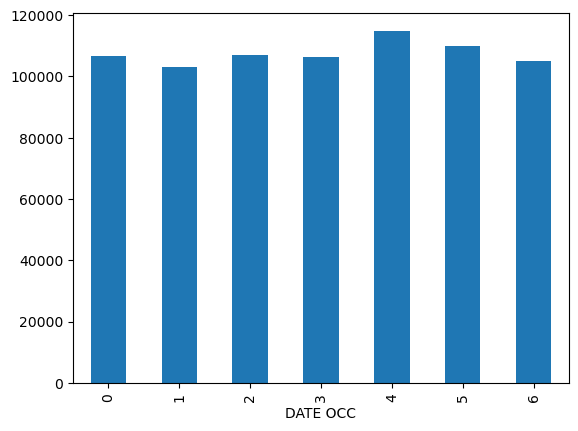

In [14]:
# nor do weekends seem to matter much
df['DATE OCC'].groupby(df['DATE OCC'].dt.dayofweek).count().plot(kind='bar')

<Axes: xlabel='DATE OCC', ylabel='Density'>

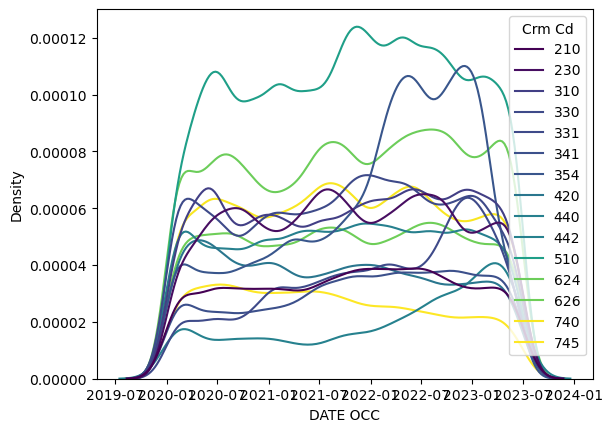

In [15]:
# if we segment by crime code do we see anything interesting?
kdeplot(data=df[df['Crm Cd'].isin(df['Crm Cd'].value_counts()[:15].index.tolist())], x='DATE OCC', hue='Crm Cd', palette='viridis')

<Axes: xlabel='DATE OCC', ylabel='Density'>

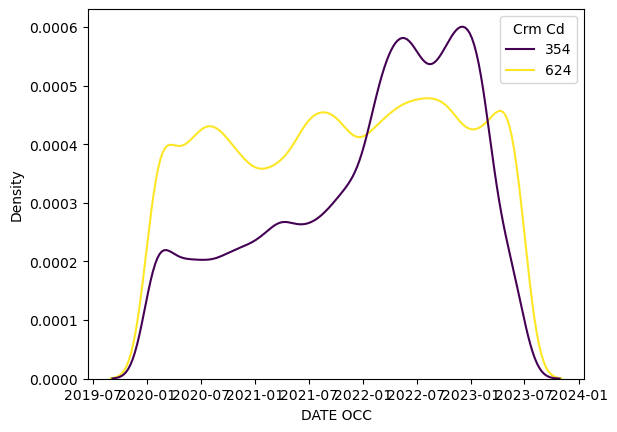

In [16]:
# we see a persistent surge in one code; which one is it?
kdeplot(data=df[df['Crm Cd'].isin(df['Crm Cd'].value_counts()[1:3].index.tolist())], x='DATE OCC', hue='Crm Cd', palette='viridis')

In [17]:
df[df['Crm Cd'].isin(df['Crm Cd'].value_counts()[:10].index.tolist())][['Crm Cd', 'Crm Cd Desc']].drop_duplicates()

,Crm Cd,Crm Cd Desc
0,624,BATTERY - SIMPLE ASSAULT
4,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
10,330,BURGLARY FROM VEHICLE
15,626,INTIMATE PARTNER - SIMPLE ASSAULT
17,440,THEFT PLAIN - PETTY ($950 & UNDER)
18,354,THEFT OF IDENTITY
24,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
30,310,BURGLARY
33,510,VEHICLE - STOLEN
45,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


Identity theft seems like kind of a surprise, doesn't it?

In [18]:
# is identity theft a secular trend or is the rise concentrated in one ethnic group? 
identity_df = df[df['Crm Cd'] == 354]
identity_victim_descent = identity_df['Vict Descent'].replace(to_replace={'B': 'Black', 'H': 'Hispanic', 'W': 'White',}).value_counts()
identity_descent_df = pd.DataFrame(data={'Descent': identity_victim_descent.index, 'Count': identity_victim_descent.values}).reset_index(drop=True)
identity_descent_df.loc[identity_descent_df['Count'] < 8000, 'Descent'] = 'Other' # threshold
px.pie(identity_descent_df, names='Descent', values='Count').show()